In [1]:
import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters

import data_preparation as dp
import filepaths as fp
from rnn_model_predict import predict
from plots import showPlot

In [2]:
(slang, tlang, index_array_pairs) = dp.prepare_training_data(
    fp.spath_toy, fp.tpath_toy, False)

max_length = 0
for pair in index_array_pairs:
    max_length = max(len(pair[0]), len(pair[1]), max_length)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hidden_size = 256 #256

encoder1 = EncoderRNN(slang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, tlang.n_words, max_length, dropout_p=0.1).to(device)


In [6]:
plot_losses = trainIters(
    index_array_pairs, encoder1, attn_decoder1,  
    1500, max_length, print_every=150, plot_every=15 )

0m 6s (- 1m 1s) (150 10%) 3.1495
0m 13s (- 0m 54s) (300 20%) 3.1340
0m 20s (- 0m 48s) (450 30%) 2.9548
0m 28s (- 0m 42s) (600 40%) 2.6383
0m 36s (- 0m 36s) (750 50%) 2.2715
0m 44s (- 0m 29s) (900 60%) 1.5840
0m 53s (- 0m 22s) (1050 70%) 0.8749
1m 1s (- 0m 15s) (1200 80%) 0.2627
1m 10s (- 0m 7s) (1350 90%) 0.1010
1m 18s (- 0m 0s) (1500 100%) 0.0632


In [7]:
for pair in index_array_pairs:
    s_indices = pair[0]
#     print(s_tensor)
    t_indices, a = predict(encoder1, attn_decoder1, s_indices, max_length)
    print(dp.sentenceFromIndexes(tlang, t_indices))
        

a man and a woman walking in the city .

a waterfall in a forest with many trees .

a bee hovering over purple and orange flowers .

a calm lake surrounded by trees and rocks .

two people on a football field one on the ground .

a young man performs an aerial stunt on a skateboard .

two dogs running along the beach .

a dog is running beside a body of water .

a cyclist is wearing a helmet .

a man wearing a black hat is shooting a rifle outside .

a small child outside with autumn leaves blowing around her face .

a bright red boat on perfectly calm blue water .

a wooden walkway leading up a grassy slope under a blue sky .

a bike race is taking place with spectators watching .

a four wheeled wooden cart parked on a a wooden platform .

customers are standing outside of a convenience store .

a woman poses on a rocky beach as her friend takes a photo .

a man and two girls playing on the shore of the beach .

a little girl playing with her toys in the sand .

a man in pinstripe pa

<Figure size 432x288 with 0 Axes>

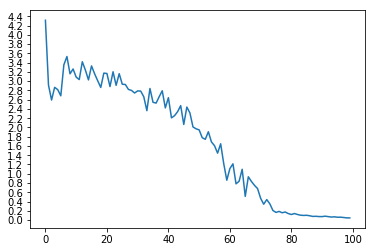

In [4]:
showPlot(plot_losses)
